# Customer Churn Prediction

### In this project, we will predict whether a customer will leave the bank or not based on many factors

Following Factors are:
1. Credit score
2. Location of the Customer
3. Gender
4. Age
5. Tenure
6. Account Balance
7. Number of Bank Products Customer Uses
8. Has Credit Card
9. Is Active Member
10. Estimated Salary

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png')

In [2]:
# Importing the essential Libraries
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Printing Unique Values of the categorical variables
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())
print(df['Exited'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [9]:
print(df['Geography'].value_counts())
print(df['Gender'].value_counts())
print(df['Exited'].value_counts())
print(df['IsActiveMember'].value_counts())
print(df['NumOfProducts'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [10]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:
# Including only Potential Predictors as independent varibles
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [14]:
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
final_dataset = pd.get_dummies(final_dataset, drop_first=False)

In [16]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [17]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

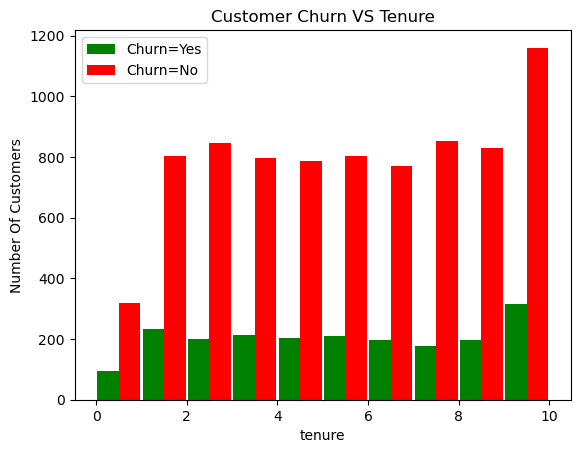

In [19]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn VS Tenure")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

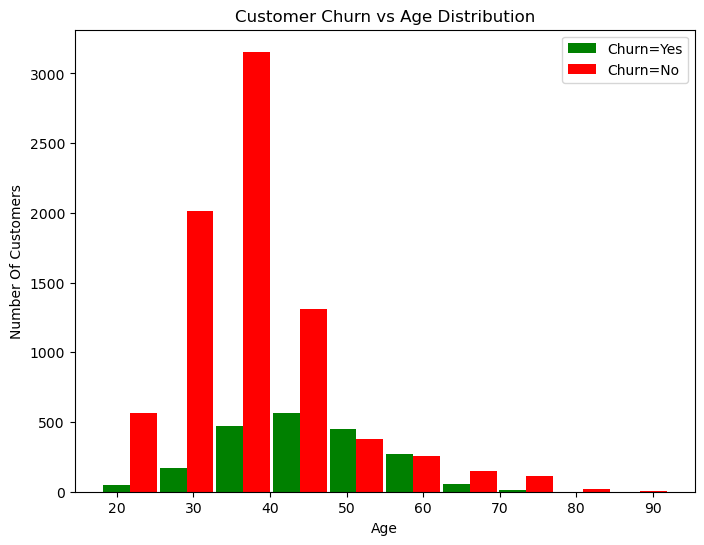

In [20]:
# Plot the histogram on age basis
age_churn_no = df[df.Exited == 0].Age
age_churn_yes = df[df.Exited == 1].Age
plt.figure(figsize=(8, 6))  
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn vs Age Distribution")

plt.hist([age_churn_yes, age_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])

plt.legend()
plt.show()


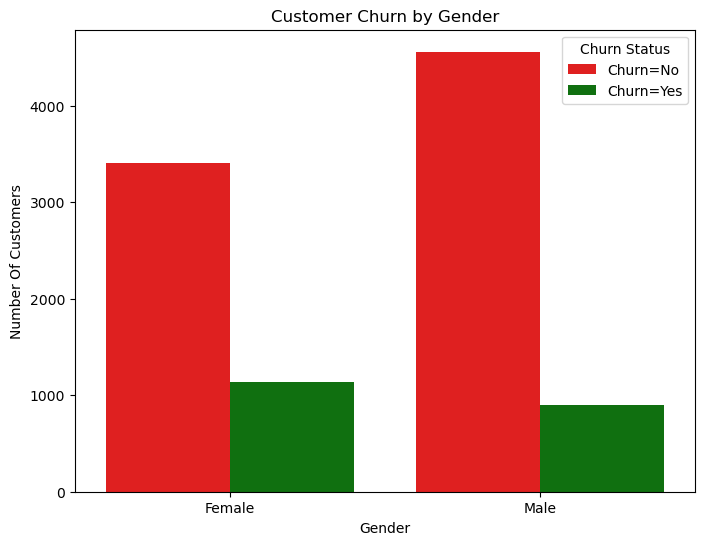

In [21]:
#Plotting countplot as Gender may contains categorical values
plt.figure(figsize=(8, 6)) 
plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn by Gender")
sns.countplot(x='Gender', hue='Exited', data=df, palette=['red', 'green'])
plt.legend(title='Churn Status', labels=['Churn=No', 'Churn=Yes'])
plt.show()


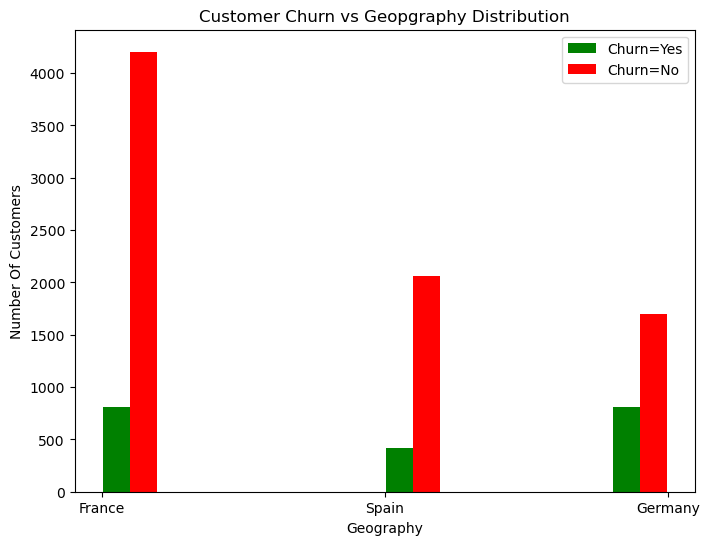

In [22]:
# Plot the histogram on geography basis
age_churn_no = df[df.Exited == 0].Geography
age_churn_yes = df[df.Exited == 1].Geography
plt.figure(figsize=(8, 6))  
plt.xlabel("Geography")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn vs Geopgraphy Distribution")

plt.hist([age_churn_yes, age_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])

plt.legend()
plt.show()


<Axes: >

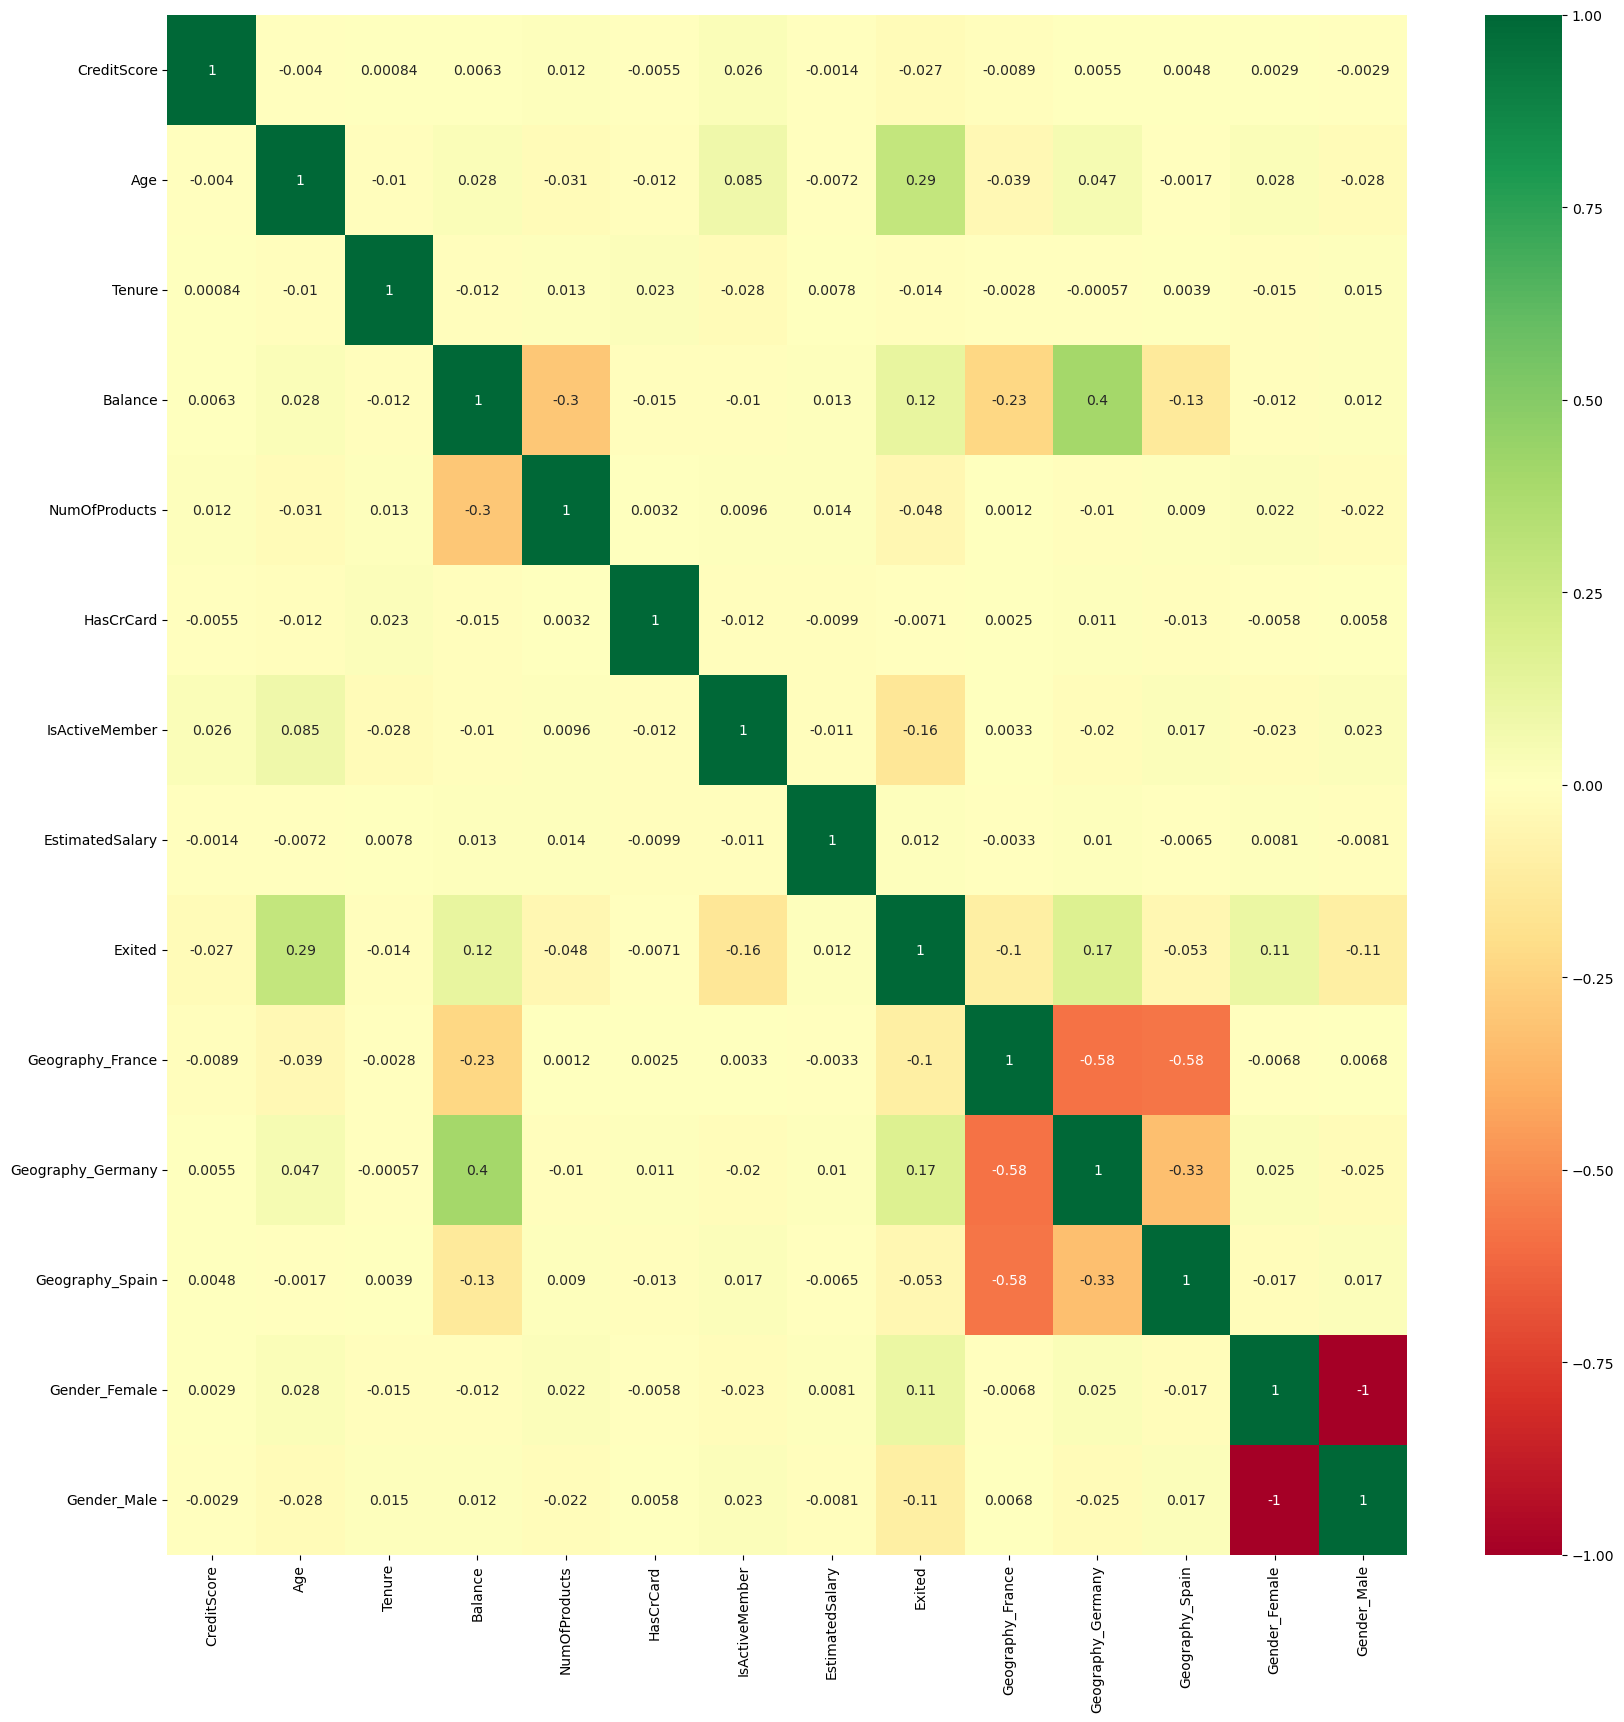

In [23]:
# Plotting The Correlations between all the features
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

From the heatmap , we find that teh Age, Balance and the Geography of the Customer are Most important features

In [24]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [25]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True


In [27]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [28]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [29]:
df1=pd.DataFrame(X_train)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False


In [30]:
X_train.to_csv("./X_train",index=False)

In [31]:
pd.DataFrame(X_test).tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
6412,602,53,5,98268.84,1,0,1,45038.29,False,True,False
8285,609,25,10,0.00,1,0,1,109895.16,True,False,False
7853,730,47,7,0.00,1,1,0,33373.26,True,False,False
1095,692,29,4,0.00,1,1,0,76755.99,True,False,False
6929,628,39,1,115341.19,1,1,1,107674.30,False,True,False


In [32]:
pd.DataFrame(y_test).tail(6)

,0
1994,0
1995,1
1996,0
1997,1
1998,1
1999,1


In [33]:
# Standardizing the Dataset ie feature scalingg
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ...  1.00150113 -0.57946723
  -0.57638802]
 [-0.20389777  0.29493847 -0.3483691  ... -0.99850112  1.72572313
  -0.57638802]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.99850112 -0.57946723
   1.73494238]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.15932282  0.3900109   1.03972843 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.47065475  1.15059039 -1.38944225 ... -0.99850112  1.72572313
  -0.57638802]]


In [35]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.577496,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,-0.998501,1.725723,-0.576388
1,-0.297297,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,1.001501,-0.579467,-0.576388
2,-0.525607,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,-0.998501,-0.579467,1.734942
3,-1.511492,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,-0.998501,1.725723,-0.576388
4,-0.951094,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,-0.998501,-0.579467,1.734942
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.515230,1.340735,-0.001345,0.354911,-0.916688,-1.540351,0.974817,-0.963100,-0.998501,1.725723,-0.576388
1996,-0.442586,-1.321293,1.733777,-1.218471,-0.916688,-1.540351,0.974817,0.164545,1.001501,-0.579467,-0.576388
1997,0.813120,0.770301,0.692704,-1.218471,-0.916688,0.649203,-1.025834,-1.165916,1.001501,-0.579467,-0.576388
1998,0.418766,-0.941003,-0.348369,-1.218471,-0.916688,0.649203,-1.025834,-0.411635,1.001501,-0.579467,-0.576388


In [36]:
print(y_train)

[0 0 1 ... 1 1 0]


In [37]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [38]:
print(model.feature_importances_)

[0.12824969 0.24015677 0.10736345 0.13396235 0.14140266 0.03018778
 0.04395155 0.12498361 0.0114348  0.0269401  0.01136723]


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [40]:
y_pred = rf.predict(X_test)


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1549   58]
 [ 205  188]]
0.8685


In [43]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
# Initialize the Linear Regression model
linear_reg = LinearRegression()
# Train the model
linear_reg.fit(X_train, y_train)
# Predict on the test data
y_pred = linear_reg.predict(X_test)
# Apply a threshold (e.g., 0.5) to convert the regression output to binary classification
y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

# You can also print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# Calculate Mean Squared Error for the regression model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")


Accuracy: 81.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1607
           1       0.62      0.11      0.19       393

    accuracy                           0.81      2000
   macro avg       0.72      0.55      0.54      2000
weighted avg       0.78      0.81      0.76      2000


Mean Squared Error: 0.1343


In [45]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.577496,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,-0.998501,1.725723,-0.576388
1,-0.297297,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,1.001501,-0.579467,-0.576388
2,-0.525607,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,-0.998501,-0.579467,1.734942
3,-1.511492,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,-0.998501,1.725723,-0.576388
4,-0.951094,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,-0.998501,-0.579467,1.734942
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.515230,1.340735,-0.001345,0.354911,-0.916688,-1.540351,0.974817,-0.963100,-0.998501,1.725723,-0.576388
1996,-0.442586,-1.321293,1.733777,-1.218471,-0.916688,-1.540351,0.974817,0.164545,1.001501,-0.579467,-0.576388
1997,0.813120,0.770301,0.692704,-1.218471,-0.916688,0.649203,-1.025834,-1.165916,1.001501,-0.579467,-0.576388
1998,0.418766,-0.941003,-0.348369,-1.218471,-0.916688,0.649203,-1.025834,-0.411635,1.001501,-0.579467,-0.576388
